## COVID_19_EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('COVID-19_Case_Data_Clean.csv')
df

,cdc_report_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn,interval_dt
0,2020/8/17,2020/8/9,Laboratory-confirmed case,Male,0 - 9 Years,Unknown,No,No,No,No,8.0
1,2020/4/10,2020/3/26,Laboratory-confirmed case,Male,0 - 9 Years,Unknown,No,No,No,No,15.0
2,2020/7/27,2020/7/13,Laboratory-confirmed case,Male,0 - 9 Years,Unknown,No,No,No,No,14.0
3,2020/8/10,2020/8/5,Laboratory-confirmed case,Male,0 - 9 Years,Unknown,No,No,No,No,5.0
4,2020/8/17,2020/8/6,Laboratory-confirmed case,Male,0 - 9 Years,Unknown,No,No,No,No,11.0
...,...,...,...,...,...,...,...,...,...,...,...
411857,2020/6/14,2020/6/13,Laboratory-confirmed case,Female,70 - 79 Years,"White, Non-Hispanic",No,No,No,Yes,1.0
411858,2020/6/17,2020/6/8,Laboratory-confirmed case,Female,70 - 79 Years,Hispanic/Latino,No,No,No,Yes,9.0
411859,2020/7/2,2020/6/11,Laboratory-confirmed case,Female,70 - 79 Years,Hispanic/Latino,No,No,No,No,21.0
411860,2020/6/13,NaN,Laboratory-confirmed case,Male,70 - 79 Years,"Black, Non-Hispanic",Yes,No,No,No,NaN


hosp_yn
No     331052
Yes     80810
Name: hosp_yn, dtype: int64

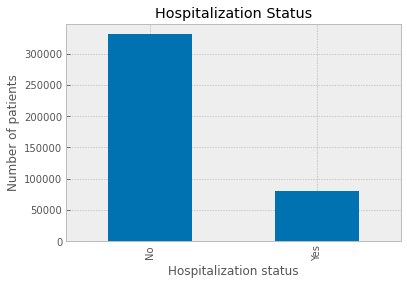

In [76]:
hosp = df.groupby('hosp_yn').hosp_yn.count()
ax = hosp.plot(kind='bar')
ax.set_xlabel('Hospitalization status')
ax.set_ylabel('Number of patients')
ax.set_title('Hospitalization Status')
plt.show
hosp

icu_yn
No     382319
Yes     29543
Name: icu_yn, dtype: int64

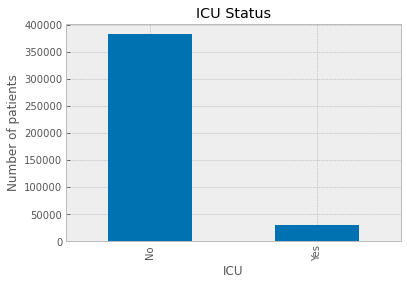

In [122]:
icu = df.groupby('icu_yn').icu_yn.count()
ax = icu.plot(kind='bar')
ax.set_xlabel('ICU')
ax.set_ylabel('Number of patients')
ax.set_title('ICU Status')
plt.show
icu

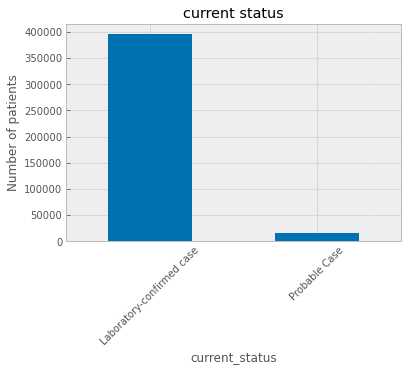

current_status
Laboratory-confirmed case    395399
Probable Case                 16463
Name: current_status, dtype: int64

In [77]:
status = df.groupby('current_status').current_status.agg('count')
ax = status.plot(kind='bar')
plt.ylabel('Number of patients')
plt.title('current status')
plt.xticks(rotation=45)
plt.show()
status

sex
Female    216852
Male      195010
Name: sex, dtype: int64

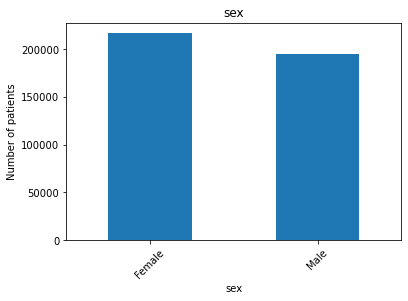

In [3]:
sex = df.groupby('sex').sex.agg('count')
ax = sex.plot(kind='bar')
plt.ylabel('Number of patients')
plt.title('sex')
plt.xticks(rotation=45)
plt.savefig('sex.png')
sex

In [127]:
death = df.groupby('death_yn').death_yn.count()
death

death_yn
No     381683
Yes     30179
Name: death_yn, dtype: int64

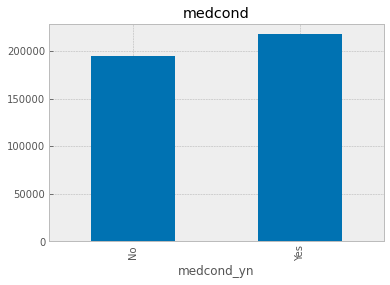

medcond_yn
No     194255
Yes    217607
Name: medcond_yn, dtype: int64

In [130]:
cond = df.groupby('medcond_yn').medcond_yn.count()
ag = cond.plot(kind='bar')
ag.set_title('medcond')
plt.show()
cond

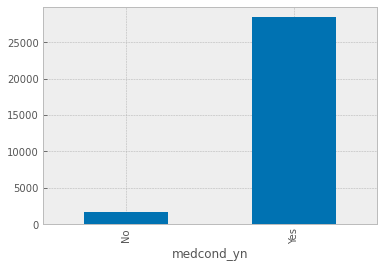

medcond_yn
No      1753
Yes    28426
Name: medcond_yn, dtype: int64

In [133]:
cond_death = df.loc[df['death_yn']=='Yes'].groupby('medcond_yn').medcond_yn.count()
ax = cond_death.plot(kind='bar')
plt.show()
cond_death

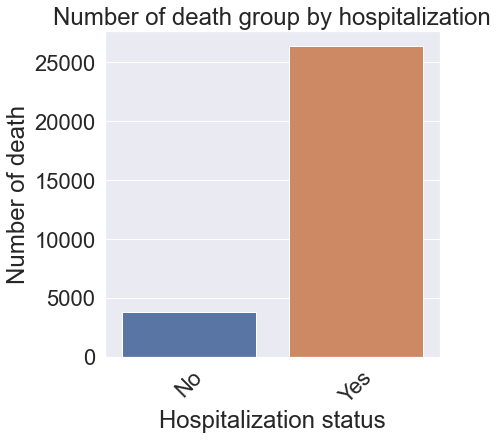

hosp_yn
No      3798
Yes    26381
Name: hosp_yn, dtype: int64

In [21]:
# given the number of death, 'yes' receive hosp, 'no' not receive hosp
hosp_death = df.loc[df['death_yn']=='Yes'].groupby('hosp_yn').hosp_yn.count()

sns.set_style("whitegrid")
sns.set_color_codes("pastel")
sns.set(font_scale = 2)
plt.figure(figsize=(6,6))
sns.barplot(hosp_death.index,hosp_death.values)
plt.xlabel('Hospitalization status')
plt.ylabel('Number of death')
plt.title('Number of death group by hospitalization')
plt.xticks(rotation=45)
plt.show()

hosp_death

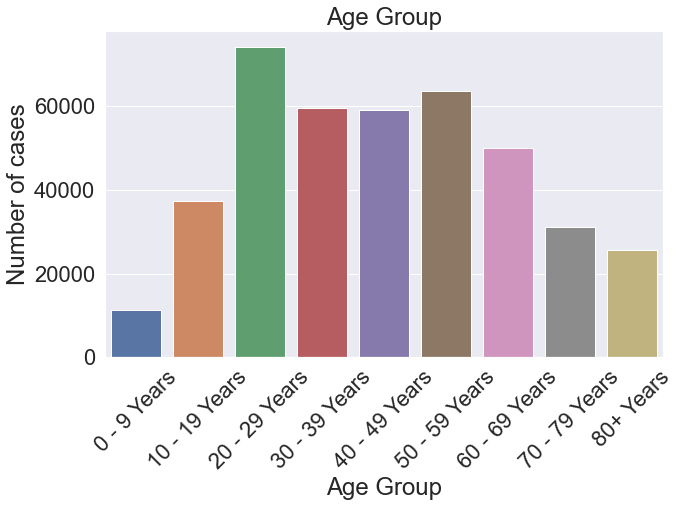

age_group
0 - 9 Years      11212
10 - 19 Years    37358
20 - 29 Years    74196
30 - 39 Years    59579
40 - 49 Years    59065
50 - 59 Years    63562
60 - 69 Years    49979
70 - 79 Years    31232
80+ Years        25617
Name: age_group, dtype: int64

In [25]:
age = df.groupby('age_group').age_group.agg('count')

sns.set_style("whitegrid")
sns.set_color_codes("pastel")
sns.set(font_scale = 2)
plt.figure(figsize=(10,6))
sns.barplot(age.index,age.values)
plt.xlabel('Age Group')
plt.ylabel('Number of cases')
plt.title('Age Group')
plt.xticks(rotation=45)
plt.show()

age

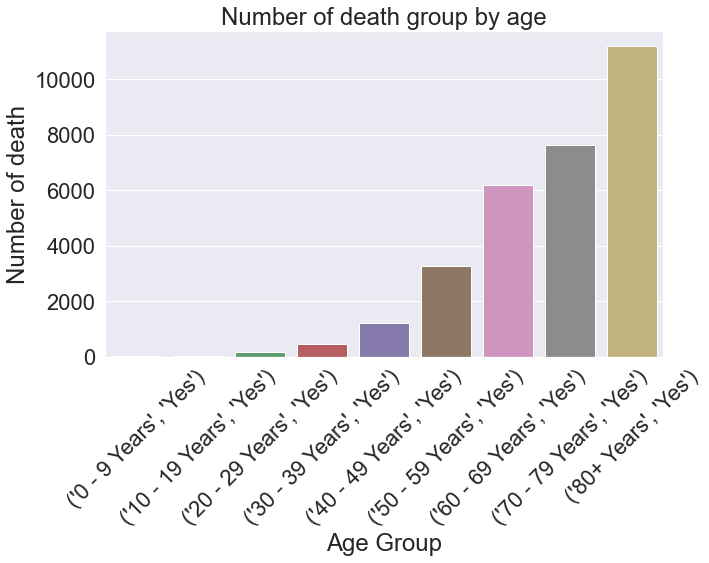

age_group      death_yn
0 - 9 Years    Yes            15
10 - 19 Years  Yes            30
20 - 29 Years  Yes           162
30 - 39 Years  Yes           479
40 - 49 Years  Yes          1211
50 - 59 Years  Yes          3277
60 - 69 Years  Yes          6205
70 - 79 Years  Yes          7612
80+ Years      Yes         11188
Name: death_yn, dtype: int64

In [26]:
age = df.loc[df['death_yn']=='Yes'].groupby('age_group').death_yn.value_counts()
sns.set_style("whitegrid")
sns.set_color_codes("pastel")
sns.set(font_scale = 2)
plt.figure(figsize=(10,6))
sns.barplot(age.index,age.values)
plt.xlabel('Age Group')
plt.ylabel('Number of death')
plt.title('Number of death group by age')
plt.xticks(rotation=45)
plt.show()
age

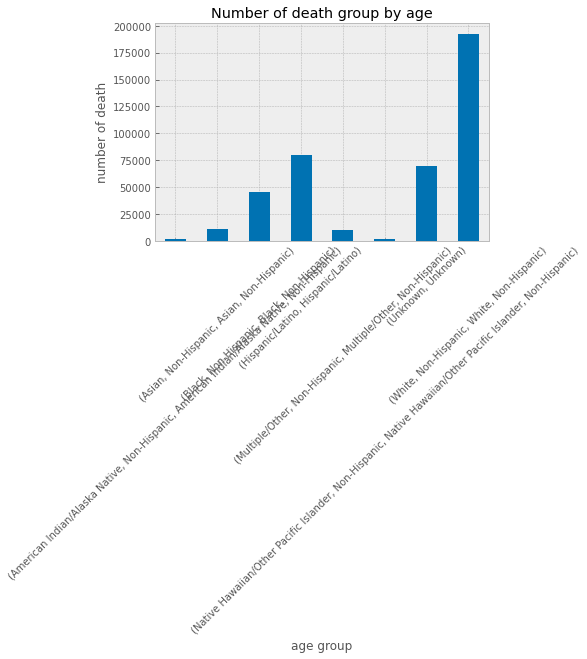

Race and ethnicity (combined)                         Race and ethnicity (combined)                       
American Indian/Alaska Native, Non-Hispanic           American Indian/Alaska Native, Non-Hispanic               1282
Asian, Non-Hispanic                                   Asian, Non-Hispanic                                      11096
Black, Non-Hispanic                                   Black, Non-Hispanic                                      45429
Hispanic/Latino                                       Hispanic/Latino                                          79934
Multiple/Other, Non-Hispanic                          Multiple/Other, Non-Hispanic                              9942
Native Hawaiian/Other Pacific Islander, Non-Hispanic  Native Hawaiian/Other Pacific Islander, Non-Hispanic      2037
Unknown                                               Unknown                                                  69564
White, Non-Hispanic                                   White, Non-Hispanic 

In [119]:
race = df.groupby('Race and ethnicity (combined)')['Race and ethnicity (combined)'].value_counts()
ax = race.plot(kind='bar')
plt.title('Number of death group by age')
plt.xlabel('age group')
plt.ylabel('number of death')
plt.xticks(rotation=45)
plt.show()
race

In [153]:
death = df.loc[df['death_yn']=='Yes']
interval_death = death.loc[df['interval_dt']<=0]
interval_total = df.loc[df['interval_dt']<=0]
print(interval_death.shape)
print(interval_total.shape)

(4179, 11)
(87012, 11)


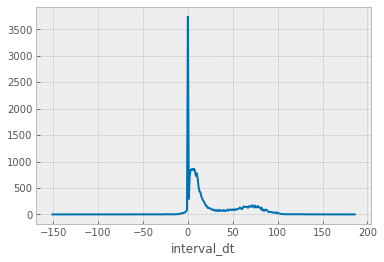

In [166]:
late = df.loc[df['death_yn']=='Yes'].groupby('interval_dt').death_yn.count()
ax = late.plot(kind='line')
plt.show()

In [19]:
df=df.dropna(subset=['interval_dt'],axis=0)
df.shape

(369690, 12)

In [33]:
df.drop(columns='Asymptomatic_Yes')

,cdc_report_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn,interval_dt
0,2020/8/17,2020/8/9,Laboratory-confirmed case,Male,0 - 9 Years,Unknown,No,No,No,No,8.0
1,2020/4/10,2020/3/26,Laboratory-confirmed case,Male,0 - 9 Years,Unknown,No,No,No,No,15.0
2,2020/7/27,2020/7/13,Laboratory-confirmed case,Male,0 - 9 Years,Unknown,No,No,No,No,14.0
3,2020/8/10,2020/8/5,Laboratory-confirmed case,Male,0 - 9 Years,Unknown,No,No,No,No,5.0
4,2020/8/17,2020/8/6,Laboratory-confirmed case,Male,0 - 9 Years,Unknown,No,No,No,No,11.0
...,...,...,...,...,...,...,...,...,...,...,...
411856,2020/5/31,2020/5/28,Laboratory-confirmed case,Female,70 - 79 Years,"White, Non-Hispanic",No,No,No,No,3.0
411857,2020/6/14,2020/6/13,Laboratory-confirmed case,Female,70 - 79 Years,"White, Non-Hispanic",No,No,No,Yes,1.0
411858,2020/6/17,2020/6/8,Laboratory-confirmed case,Female,70 - 79 Years,Hispanic/Latino,No,No,No,Yes,9.0
411859,2020/7/2,2020/6/11,Laboratory-confirmed case,Female,70 - 79 Years,Hispanic/Latino,No,No,No,No,21.0


In [35]:
for i in df['interval_dt']:
    if i <= 0:
        df['Asymptomatic'] = 1
    elif i > 0:
        df['Asymptomatic'] = 0

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [38]:
df['Asymptomatic'].describe()

count    369690.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: Asymptomatic, dtype: float64